In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 3 - Neural Networks
Third assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using neural networks to solve real-world problems in both classification and regression. Students will apply the concepts they have learned to build, train, and optimize neural networks, using a validation set to fine-tune hyperparameters. Students will also get used to generating important plots during training to analyse the models' behaviour. By the end of the project, students will have gained hands-on experience in implementing neural networks.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).3

## Notebook Overview:

1. [Regression](#Regression) (50%)
2. [Classification](#Classification) (50%)

# Regression
## Dataset and Problem Description
In this exercise, you will use the Energy Efficiency Prediction dataset. This dataset contains information about the energy efficiency of buildings based on eight features, including the size of the building, the orientation, and the type of building materials used. The dataset includes two targets: heating load and cooling load, which represent the energy required to heat and cool the building, respectively.
This dataset is useful for building neural networks that predict the energy efficiency of buildings, which is an important problem in the field of sustainable energy. The dataset has been used in several machine learning research papers and provides a challenging regression problem.

## Exercise Description: Energy Efficiency Prediction with Neural Networks
In this exercise, you will use the Energy Efficiency Prediction dataset provided.
You will build and train a neural network to predict the heating load (column labelled y1 in the dataset) and the cooling load (column labelled y2) of a building based on its energy efficiency features. 

**To complete this exercise, you will write code to build and train neural networks for this problem:**

1. Split the dataset into training, validation, and test sets, using a 70:15:15 ratio.

2. Using numpy, build a neural network that takes in the energy efficiency features as input and predicts the heating load as output. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Monitor the training by plotting the training and validation losses across the epochs. 


The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Generate 3 [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network.

3. Train your final model selecting the best combination of hyper-parameters and evaluate the final performance of the neural network using the test set and the root mean squared error as the metric and report that.

**Important:**
* Train for 50 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.

In [20]:
df = pd.read_csv('energy_efficiency.csv')

# Split the data

X = df.drop(['Y1','Y2'], axis=1, inplace=False)
y = df[['Y1','Y2']]

X_train, X_aux, y_train, y_aux = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, train_size=0.5)

In [ ]:
class NeuralNetwork:
    def __init__(self, n_inputs, n_hidden, n_outputs, n_layers, lambda_, lr=0.01):

        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.n_layers = n_layers + 2 # input layer + hidden layers + output layer
        self.lambda_ = lambda_
        self.lr = lr
        self.W = [] # [W0, W1, ..., Wn]
        self.b = [] # [b0, b1, ..., bn]

        for i in range(self.n_layers):

            if i == 0: # input layer
                self.W.append(np.random.randn(self.n_inputs, self.n_hidden))
                self.b.append(np.ones((1, self.n_hidden))) # bias

            elif i == self.n_layers-1: # output layer
                self.W.append(np.random.randn(self.n_hidden, self.n_outputs))
                self.b.append(np.ones(( 1,self.n_outputs)))

            else: # hidden layer
                self.W.append(np.random.randn(self.n_hidden, self.n_hidden))
                self.b.append(np.ones((1,self.n_hidden))) # bias
            

        self.z = [None] * self.n_layers
        self.a = [None] * self.n_layers

        self.delta = [None] * self.n_layers
        self.dW = [None] * self.n_layers
        self.db = [None] * self.n_layers

        self.y_hat = None
        self.y_hat_error = None

        self.losses = []
        self.X = None
        
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    
    def derivative_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))


    def forward(self, X):

        for i in range(self.n_layers):

            if i == 0: # input layer
                
                self.z[i] = X @ self.W[i] + self.b[i]
                self.a[i] = self.sigmoid(self.z[i])

            elif i == self.n_layers-1: # output layer

                self.z[i] = self.a[i-1] @ self.W[i] + self.b[i]
                self.a[i] = self.z[i] # Regression output layer have activation function = identity
                self.y_hat = self.a[i]

            else: # hidden layer

                self.z[i] = self.a[i-1] @ self.W[i] + self.b[i]
                self.a[i] = self.sigmoid(self.z[i])
        


    def backward(self, X, y_true):

        for i in range(self.n_layers-1, -1, -1): # [n_layers-1, n_layers-2, ..., 0]

            if i == self.n_layers-1: # output layer

                self.y_hat_error = y_true - self.y_hat # Regression output layer have activation function = identity

                delta = self.y_hat_error 

                # Regularization
                delta += self.lambda_ * np.linalg.norm(self.W[i])

                self.dW[i] = self.a[i].T @ delta
                self.db[i] = np.sum(delta, axis=0).reshape(1,-1) 

            if i == 0: # input layer
                
                delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T 

                # Regularization
                delta += self.lambda_ * np.linalg.norm(self.W[i])

                self.dW[i] = self.a[i].reshape(-1,1) @ delta
                self.db[i] = np.sum(delta, axis=0).reshape(1,-1)

            else: # hidden layer
                
                delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T

                # Regularization
                delta += self.lambda_ * np.linalg.norm(self.W[i])

                self.dW[i] = self.a[i].T @ delta
                self.db[i] = np.sum(delta, axis=0).reshape(1,-1)

    def update_weights(self):

        for i in range(self.n_layers):

            self.W[i] -= self.lr * self.dW[i].T


    def sse(self, y_true, y_pred):
        return np.sum((y_true - y_pred)**2,axis=0)
    
    def cross_entropy(self, y_true, y_hat):
        return -np.sum(y_true * np.log(y_hat + 1e-3) + (1-y_true) * np.log(1-y_hat + 1e-3))
        
    def fit(self, X, y, epochs=50):

        for epoch in range(epochs):

            random_indices = np.random.permutation(X.shape[0])
            X_random = np.array(X)[random_indices]
            y_random = np.array(y)[random_indices]

            for i in range(X.shape[0]):

                x_i = X_random[i]
                y_i = y_random[i].reshape(1,-1)
                
                self.forward(x_i)
                self.backward(x_i, y_i)
                self.update_weights()

            y_hat = self.predict(x_i)
            loss = self.sse(y_i, y_hat)
            self.losses.append(loss)
    
                
    def predict(self, X):
        self.forward(X)
        return self.y_hat
    
    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel("epochs")
        plt.ylabel("SSE")
        plt.show()

In [77]:
NN = NeuralNetwork(n_inputs = X_train.shape[1],
                              n_hidden = 3,
                              n_outputs = 2, 
                              n_layers= 5,
                              lambda_ = 0.1)

NN.fit(X_train, y_train, epochs=50)

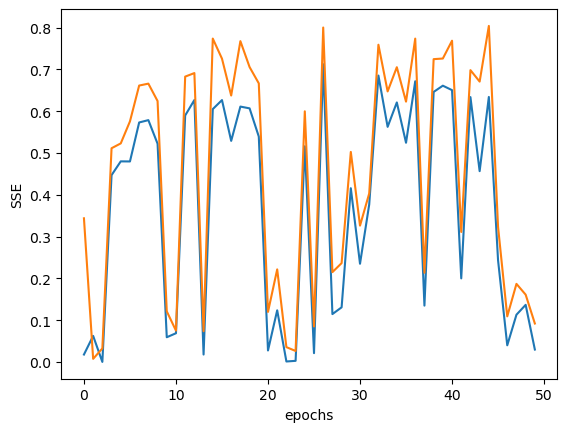

In [79]:
NN.plot_loss()

In [7]:
n_layers = [1, 2, 3]
n_hidden = [1, 2, 3]
lambda_ = [0, 0.01, 0.1]
errors = []

for l in lambda_:
    for m in n_layers:
        for n in n_hidden:

            NN = NeuralNetwork(n_inputs = X_train.shape[1], n_hidden = n, n_outputs = 2, n_layers= m, lambda_ = l)

            NN.fit(X_train, y_train)
            y_hat = NN.predict(X_val)

            error = NN.sse(np.array(y_val), np.array(y_hat))
            errors.append(error)

C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:43: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:100: RuntimeWarning: invalid value encountered in multiply
  delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T


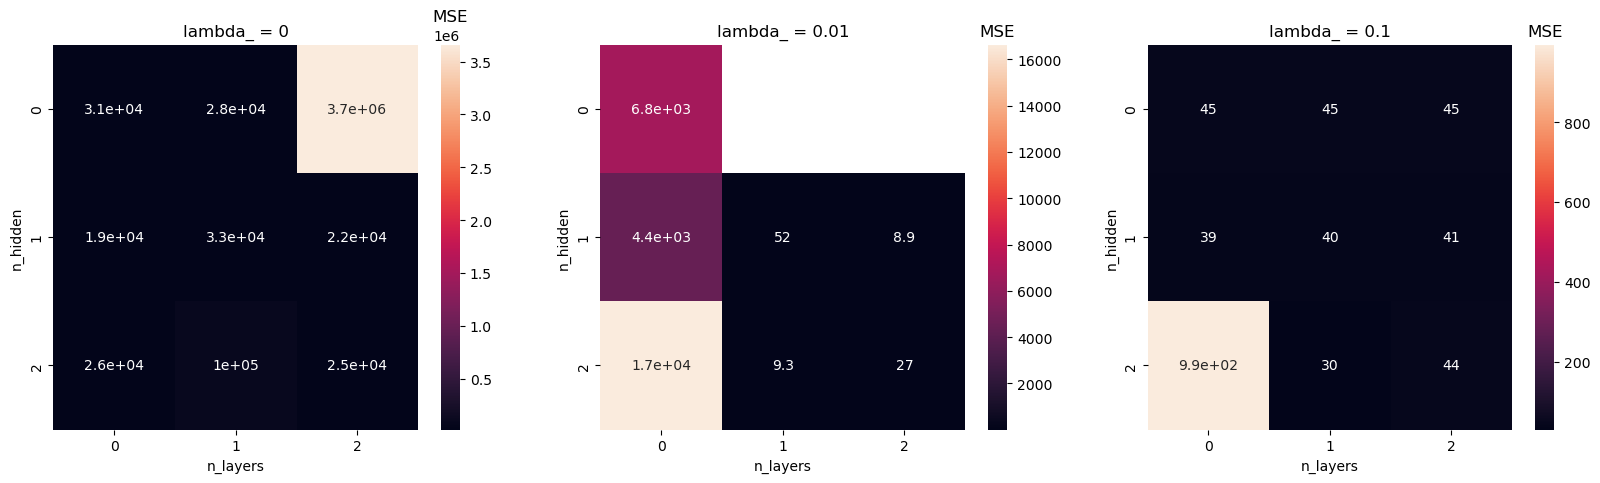

In [8]:
errors_resume = [i.mean() for i in errors]
errors_resume = np.array(errors_resume).reshape(len(lambda_), len(n_layers), len(n_hidden))

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(20,5))

for i in range(len(lambda_)):
    sns.heatmap(errors_resume[i], annot=True, ax=axs[i])
    axs[i].collections[0].colorbar.ax.set_title("MSE")
    axs[i].set_title("lambda_ = {}".format(lambda_[i]))
    axs[i].set_xlabel("n_layers")
    axs[i].set_ylabel("n_hidden")
plt.show()

In [10]:
print('Best model : n_layers = 3, n_hidden = 2, lambda_ = 0.01')

Best model : n_layers = 3, n_hidden = 2, lambda_ = 0.01


In [21]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

NN = NeuralNetwork(n_layers=3, lambda_=0.01, n_hidden=2, n_inputs=X_train.shape[1], n_outputs=2)
NN.fit(X_train, y_train)

RMSE = np.sqrt(NN.sse(np.array(y_test), np.array(NN.predict(X_test)))/len(y_test))

In [22]:
RMSE

array([0.50007939, 0.4346031 ])

# Classification
## Dataset description: 
This is a dataset from the medical domain. It describes the problem of diagnosing coronary heart disease (CHD ) via Traditional Chinese Medicine approaches. Each datapoint corresponds to a patient represented by a set of 49 features corresponding to the presence or absence of different symptoms: feelings cold or warm, sweating, etc. The 6 labels represent presence or absence of specific heart conditions: deficiency of heart qi syndrome, deficiency of heart yang syndrome, deficiency of heart yin syndrome, qi stagnation syndrome, turbid phlegm syndrome, and blood stasis syndrome.

## Exercise Description: CHD49 Multi-Label Classification with Neural Networks
In this exercise, you will build and train a neural network to predict the 6 different labels of CHD (last 6 columns of the dataset). 

**To complete this exercise, follow these steps:**

1. Load the dataset and split it into training, validation, and test sets, using a 70:15:15 ratio. 

2. Build a neural network using numpy that takes in the features as input and predicts the 6 different labels. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using batch gradient descent. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. Calculate the loss for each configuration on the validation set.

2. Generate 3 heatmaps, one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network.

3. Train your final model selecting the best combination of hyper-parameters and evaluate the final performance of the neural network using the test set and by calculating the area under the ROC curve, accuracy and F1 score as metrics and report these.

**Important:**
* Train for at least 1000 epochs, remember that one epoch finishes when the whole training set was seen during training.
* Set the learning rate $\eta$ to $0.01$.


In [70]:
## your code goes here: 

df = pd.read_csv("CHD_49.csv")

X = df.drop(columns=["label1","label2","label3","label4","label5","label6"])

y = df[["label1","label2","label3","label4","label5","label6"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [97]:
class NeuralNetwork_2:
    def __init__(self, n_inputs, n_hidden, n_outputs, n_layers, lambda_, lr=0.01):

        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.n_layers = n_layers + 2 # input layer + hidden layers + output layer
        self.lambda_ = lambda_
        self.lr = lr
        self.W = [] # [W0, W1, ..., Wn]
        self.b = [] # [b0, b1, ..., bn]

        for i in range(self.n_layers):

            if i == 0: # input layer
                self.W.append(np.random.randn(self.n_inputs, self.n_hidden))
                self.b.append(np.ones((1, self.n_hidden))) # bias

            elif i == self.n_layers-1: # output layer
                self.W.append(np.random.randn(self.n_hidden, self.n_outputs))
                self.b.append(np.ones(( 1,self.n_outputs)))

            else: # hidden layer
                self.W.append(np.random.randn(self.n_hidden, self.n_hidden))
                self.b.append(np.ones((1,self.n_hidden))) # bias
            

        self.z = [None] * self.n_layers
        self.a = [None] * self.n_layers

        self.delta = [None] * self.n_layers
        self.dW = [None] * self.n_layers
        self.db = [None] * self.n_layers

        self.y_hat = None
        self.y_hat_error = None

        self.losses = []
        self.X = None
        
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def derivative_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def derivative_cross_entropy(self, y_true, y_hat):
        return (y_hat-y)/(y_hat*(1-y_hat))


    def forward(self, X):

        for i in range(self.n_layers):

            if i == 0: # input layer
                
                self.z[i] = X @ self.W[i] + self.b[i]
                self.a[i] = self.sigmoid(self.z[i])

            elif i == self.n_layers-1: # output layer

                self.z[i] = self.a[i-1] @ self.W[i] + self.b[i]
                self.a[i] = self.sigmoid(self.z[i]) 
                self.y_hat = self.a[i]

            else: # hidden layer

                self.z[i] = self.a[i-1] @ self.W[i] + self.b[i]
                self.a[i] = self.sigmoid(self.z[i])
        


    def backward(self, X, y_true):

        for i in range(self.n_layers-1, -1, -1): # [n_layers-1, n_layers-2, ..., 0]

            if i == self.n_layers-1: # output layer

                delta = self.derivative_cross_entropy(y, y_hat)

                # Regularization
                delta += self.lambda_ * np.linalg.norm(self.W[i])

                self.dW[i] = self.a[i].T @ delta
                self.db[i] = np.sum(delta, axis=0).reshape(1,-1) 

            if i == 0: # input layer
                
                delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T 

                # Regularization
                delta += self.lambda_ * np.linalg.norm(self.W[i])

                self.dW[i] = self.a[i].reshape(-1,1) @ delta
                self.db[i] = np.sum(delta, axis=0).reshape(1,-1)

            else: # hidden layer
                
                delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T

                # Regularization
                delta += self.lambda_ * np.linalg.norm(self.W[i])

                self.dW[i] = self.a[i].T @ delta
                self.db[i] = np.sum(delta, axis=0).reshape(1,-1)

    def update_weights(self):

        for i in range(self.n_layers):

            self.W[i] -= self.lr * self.dW[i].T


    def cross_entropy(self, y_true, y_hat):
        return -np.sum(y_true * np.log(y_hat + 1e-3) + (1-y_true) * np.log(1-y_hat + 1e-3))
    
        
    def fit(self, X, y, epochs=1000):

        X = np.array(X)
        y = np.array(y)

        for epoch in range(epochs):

            self.forward(X)
            self.backward(X, y)
            self.update_weights()

            if epoch%10 == 0:
                y_hat = self.predict(X)
                loss = self.cross_entropy(y, y_hat)
                self.losses.append(loss)
    
                
    def predict(self, X):
        self.forward(X)
        return self.y_hat
    
    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel("epochs")
        plt.ylabel("Cross Entropy")
        plt.show()

In [98]:
X_train.shape, y_train.shape

((388, 49), (388, 6))

In [104]:
NN2 = NeuralNetwork(n_inputs = X_train.shape[1],
                              n_hidden = 3,
                              n_outputs = 6, 
                              n_layers= 5,
                              lambda_ = 0.1)

NN2.fit(X_train, y_train, epochs=100)

C:\Users\hanna\AppData\Local\Temp\ipykernel_16352\493991688.py:43: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\hanna\AppData\Local\Temp\ipykernel_16352\493991688.py:56: RuntimeWarning: invalid value encountered in matmul
  self.z[i] = X @ self.W[i] + self.b[i]


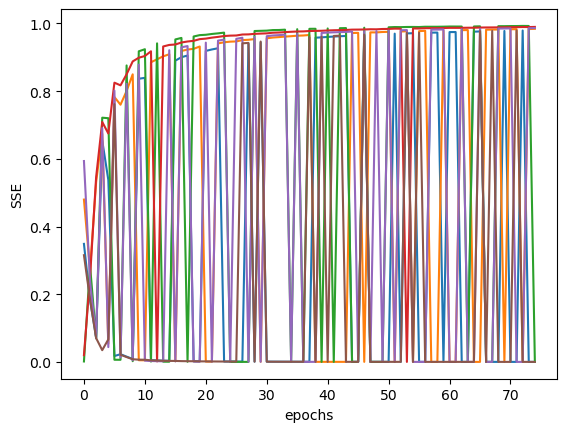

In [105]:
NN2.plot_loss()

In [15]:
n_layers = [1, 2, 3]
n_hidden = [1, 2, 3]
lambda_ = [0, 0.01, 0.1]
errors = []

for l in lambda_:
    for m in n_layers:
        for n in n_hidden:

            NN2 = NeuralNetwork(n_inputs = X_train.shape[1], n_hidden = n, n_outputs = 6, n_layers= m, lambda_ = l)

            NN2.fit(X_train, y_train)
            y_hat = NN2.predict(X_val)

            error = NN2.cross_entropy(np.array(y_val), np.array(y_hat))
            errors.append(error)

C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:119: RuntimeWarning: invalid value encountered in log
  return -np.sum(y_true * np.log(y_hat + 1e-15) + (1-y_true) * np.log(1-y_hat + 1e-15))
C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:43: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:100: RuntimeWarning: invalid value encountered in multiply
  delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T
C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:103: RuntimeWarning: invalid value encountered in add
  delta += self.lambda_ * np.linalg.norm(self.W[i])
C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:100: RuntimeWarning: invalid value encountered in matmul
  delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T


c:\Users\hanna\anaconda3\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\hanna\anaconda3\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


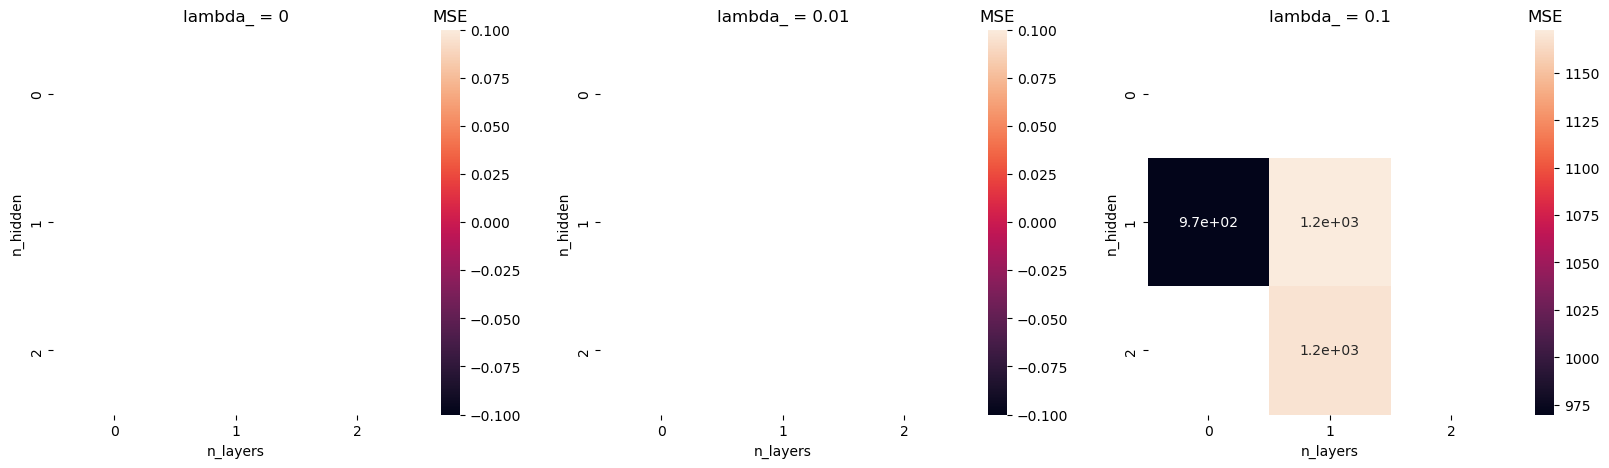

In [16]:
errors_resume = [i.mean() for i in errors]
errors_resume = np.array(errors_resume).reshape(len(lambda_), len(n_layers), len(n_hidden))

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(20,5))

for i in range(len(lambda_)):
    sns.heatmap(errors_resume[i], annot=True, ax=axs[i])
    axs[i].collections[0].colorbar.ax.set_title("MSE")
    axs[i].set_title("lambda_ = {}".format(lambda_[i]))
    axs[i].set_xlabel("n_layers")
    axs[i].set_ylabel("n_hidden")
plt.show()

In [17]:
print('Best model : n_layers = 2, n_hidden = 2, lambda_ = 0.1')

Best model : n_layers = 2, n_hidden = 2, lambda_ = 0.1


In [71]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

NN2 = NeuralNetwork(n_inputs = X_train.shape[1], n_hidden = 2, n_outputs = 6, n_layers= 2, lambda_ = 0.1)
NN2.fit(X_train, y_train)
y_hat = NN2.predict(X_val)
y_hat = y_hat > 0.5

y_val = np.array(y_val)
y_hat = np.multiply(np.array(y_hat), 1)

C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:43: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\hanna\AppData\Local\Temp\ipykernel_16572\246001488.py:100: RuntimeWarning: invalid value encountered in multiply
  delta = self.derivative_sigmoid(self.z[i]) * delta @ self.W[i].T


In [79]:
def accuracy(y_true, y_hat):

    acc = np.zeros(y_true.shape[1])

    for i in range(y_true.shape[0]):
        for j in range(y_true.shape[1]):
            if y_true[i][j] == y_hat[i][j]:
                acc[j] += 1


    return acc/ len(y_true)

def recall(y_true, y_hat):
    rec = np.zeros(y_true.shape[1])

    for i in range(y_true.shape[0]):
        for j in range(y_true.shape[1]):
            if y_true[i][j] == y_hat[i][j] and y_true[i][j] == 1:
                rec[j] += 1

    return rec/ np.sum(y_true, axis=0)


def f1_score(y_true, y_hat):
    return 2 * (accuracy(y_true, y_hat) * recall(y_true, y_hat)) / (accuracy(y_true, y_hat) + recall(y_true, y_hat))

In [80]:
print('Accuracy: ', accuracy(y_val, y_hat))
print('ROC AUC Score', roc_auc_score(y_val, y_hat))
print('F1 Score: ', f1_score(y_val, y_hat))


Accuracy:  [0.34939759 0.74698795 0.61445783 0.98795181 0.54216867 0.27710843]
ROC AUC Score 0.5
F1 Score:  [0. 0. 0. 0. 0. 0.]
